In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


import warnings
warnings.filterwarnings("ignore")

## DATASET

### Statistics of US Colleges from the 1995 by US News and World Report.


#### Private: A factor with levels No and Yes indicating private or public university
#### Apps: Number of applications received
#### Accept: Number of applications accepted
#### Enroll: Number of new students enrolled
#### Top10perc: Pct. new students from top 10% of H.S. class
#### Top25perc: Pct. new students from top 25% of H.S. class
#### F.Undergrad: Number of fulltime undergraduates
#### P.Undergrad: Number of parttime undergraduates
#### Outstate: Out-of-state tuition
#### Room.Board: Room and board costs
#### Books: Estimated book costs
#### Personal: Estimated personal spending
#### PhD: Pct. of faculty with Ph.D.’s
#### Terminal: Pct. of faculty with terminal degree
#### S.F.Ratio: Student/faculty ratio
#### perc.alumni: Pct. alumni who donate
#### Expend: Instructional expenditure per student
#### Grad.Rate: Graduation rate

In [33]:
df = pd.read_csv("College.csv").copy()
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [34]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [35]:
#some data preprocessing

df.index = df.loc[:,"Unnamed: 0"] #rename our indexes properly

df.drop("Unnamed: 0",inplace = True,axis = 1) # deleting unnecessary column

df.index.name = None

df.tail(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Winthrop University,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
Wisconsin Lutheran College,Yes,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50
Wittenberg University,Yes,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78
Wofford College,Yes,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75
Worcester Polytechnic Institute,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [38]:
#some data visualization

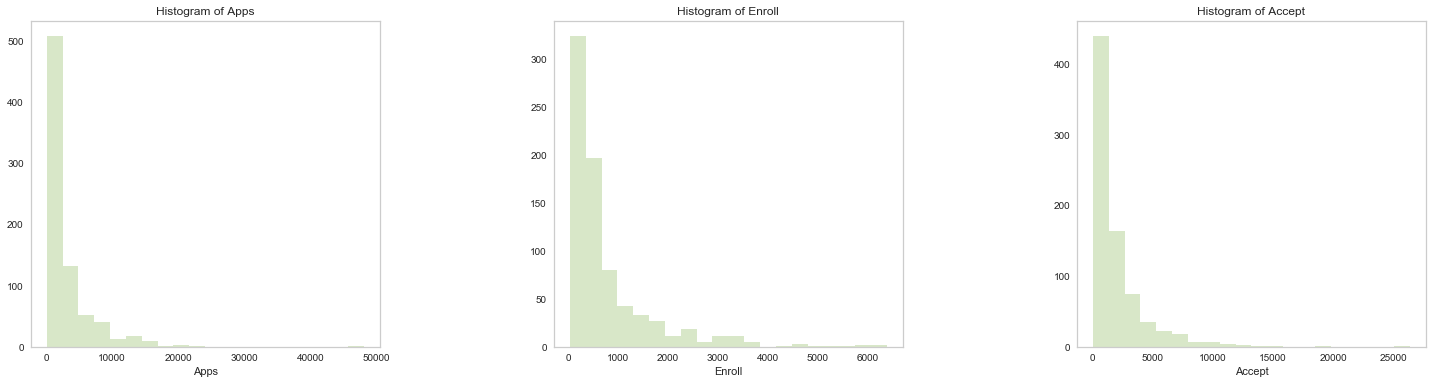

In [39]:
plt.figure(1 , figsize = (25 , 6))
n = 0 
for x in ['Apps' , 'Enroll' , 'Accept']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20,kde = False,color = 'g')
    plt.title('Histogram of {}'.format(x))
    plt.grid()    
plt.show()

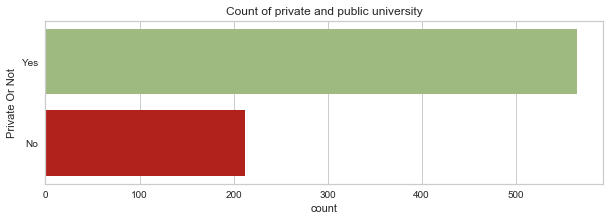

In [40]:
#Count of private and public university

plt.figure(figsize = (10 , 3))

g = sns.countplot(y = 'Private' , data = df,palette = ["g","r"])

plt.title("Count of private and public university")

g.set_ylabel("Private Or Not")

plt.show();

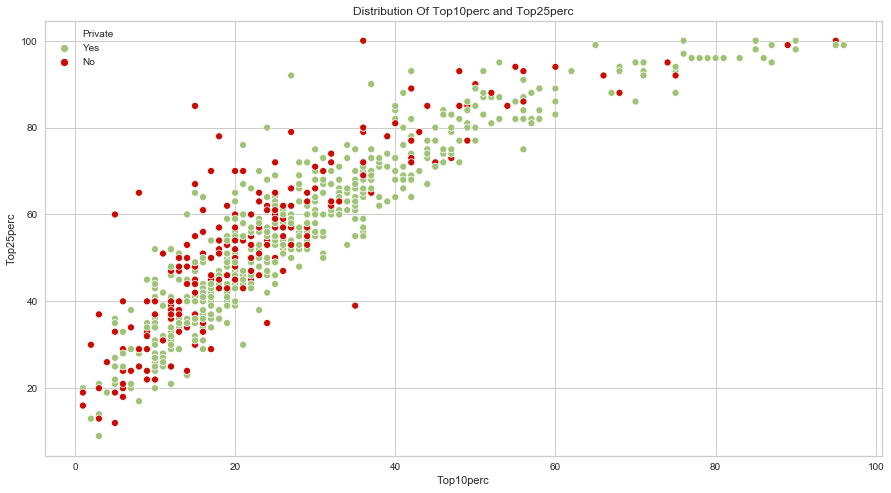

In [41]:
# Distribution Of Top10perc and Top25perc with university's status

plt.figure(figsize = (15 , 8))

g = sns.scatterplot(x = 'Top10perc' , y = 'Top25perc',hue = 'Private',data = df,s = 50,palette = ["g","r"])

g.set_xlabel("Top10perc")

g.set_ylabel("Top25perc")

g.set_title("Distribution Of Top10perc and Top25perc")

plt.show();

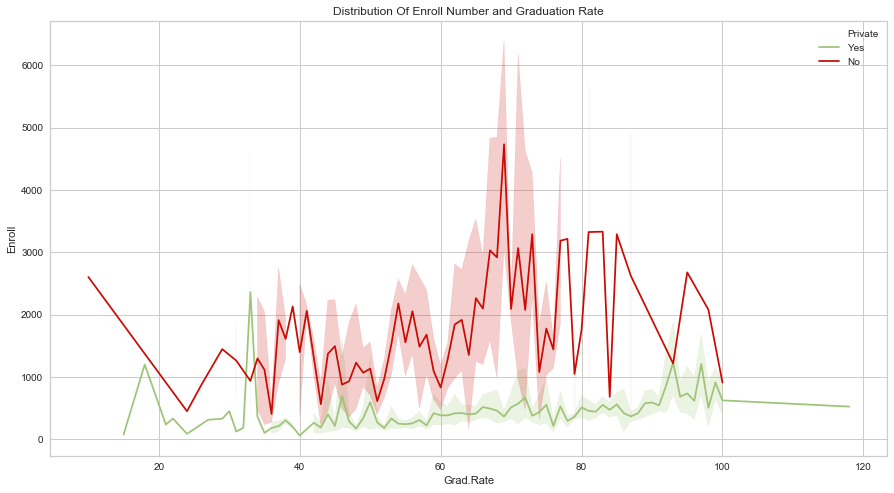

In [42]:
# Distribution Of Enroll Number and Graduation Rate with university's status

plt.figure(figsize = (15 , 8))

g = sns.lineplot(x = "Grad.Rate", y = "Enroll",hue = "Private", data = df,palette = ["g","r"]); 

g.set_title("Distribution Of Enroll Number and Graduation Rate")

plt.show();

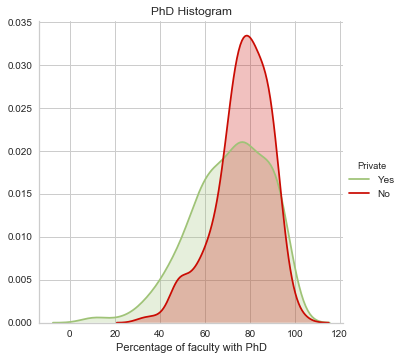

In [43]:
#PhD Histogram

g = (sns
 .FacetGrid(df,hue = "Private",height = 5,palette = ["g","r"])
 .map(sns.kdeplot, "PhD", shade = True)
 .add_legend()
);

plt.title("PhD Histogram");
plt.xlabel("Percentage of faculty with PhD");

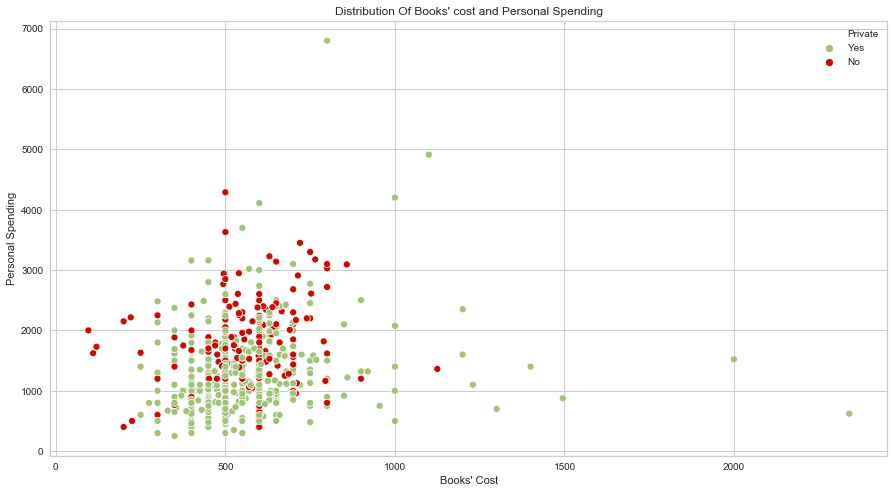

In [44]:
# Distribution Of Books' cost and Personal spending with university's status

plt.figure(figsize = (15 , 8))

g = sns.scatterplot(x = 'Books' , y = 'Personal',hue = 'Private',data = df,s = 50,palette = ["g","r"])

g.set_xlabel("Books' Cost")

g.set_ylabel("Personal Spending")

g.set_title("Distribution Of Books' cost and Personal Spending")

plt.show();

## PCA

In [45]:
#scaling

df['Private'] = df['Private'].map({'Yes':1,"No":0})

df_ = StandardScaler().fit_transform(df)

In [46]:
scores = []
components_range = range(1,df_.shape[1]+1)

for i in components_range:
    
    pca_df = PCA(n_components = i)
    
    pca_df.fit(df_)

    ratio = pca_df.explained_variance_ratio_.sum()
    
    varieance_score = ratio*100 
    
    scores.append(varieance_score)
    
    print("With {} components, our variance:{}".format(i,varieance_score))

With 1 components, our variance:30.332962791877144
With 2 components, our variance:58.42233295879129
With 3 components, our variance:65.03113171324112
With 4 components, our variance:70.89851517479897
With 5 components, our variance:76.09520690615977
With 6 components, our variance:80.80739366716865
With 7 components, our variance:84.23238712987296
With 8 components, our variance:87.49723488964177
With 9 components, our variance:90.45298310002833
With 10 components, our variance:92.73005444416937
With 11 components, our variance:94.71794880158987
With 12 components, our variance:96.4235912385957
With 13 components, our variance:97.4544634896463
With 14 components, our variance:98.38540757301337
With 15 components, our variance:99.1838193966358
With 16 components, our variance:99.67217564291076
With 17 components, our variance:99.87234151860875
With 18 components, our variance:100.00000000000003


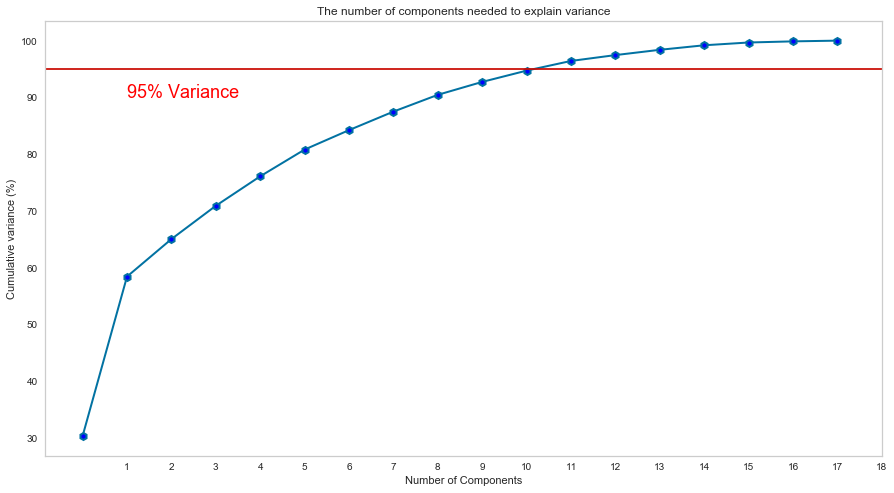

In [47]:
# We chose approximately 95% variance ratio for number of components

plt.figure(figsize = (15,8))

plt.plot(scores,color='b', linewidth=2,
         marker='h', markerfacecolor='blue', markeredgewidth=2,
         markersize=7);

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y = 95, color='r', linestyle='-')
plt.text(1, 90, '95% Variance', color = 'red', fontsize=18)


plt.xticks(np.arange(1,df_.shape[1]+1,1))

plt.grid()
plt.show()

In [48]:
#We can clearly see that when number of components equal to 10 we can explain our data with 95% success.

cluster_number = 10

new_df = PCA(n_components = cluster_number).fit_transform(df_)

## K-MEANS

In [49]:
kmeans = KMeans()

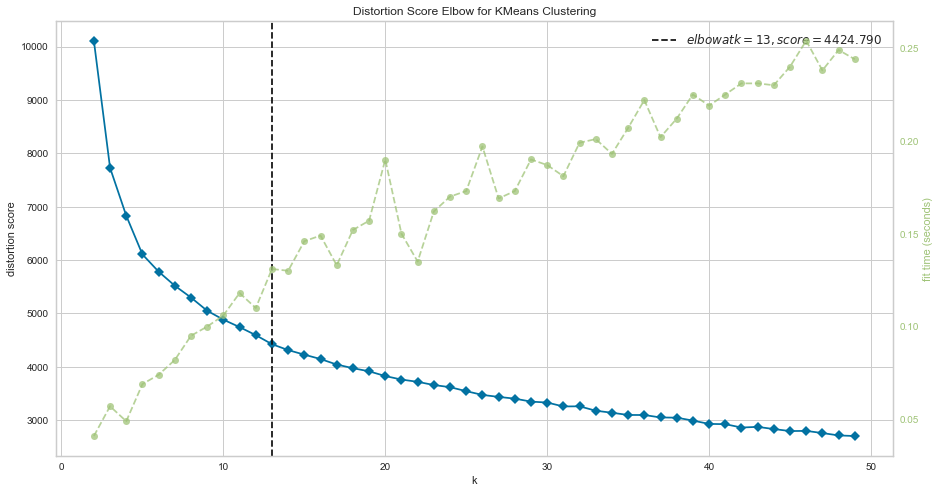

In [50]:
#Finding best k with elbow method

plt.figure(figsize = (15,8))

visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(new_df) 
visualizer.poof();

In [51]:
# we can observe that optimal cluster number is 5
#remodelling with optimal cluster number (with 5)

k_means = KMeans(n_clusters = 5)

k_fit = k_means.fit(new_df)

In [52]:
#Labels
k_fit.labels_

array([0, 0, 0, 1, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 1, 0, 0, 2, 4, 2,
       0, 3, 4, 2, 4, 3, 0, 4, 0, 4, 0, 0, 4, 0, 1, 1, 4, 2, 4, 4, 0, 0,
       4, 2, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 2, 0, 0, 3, 1, 3, 0, 4, 1, 0,
       0, 0, 4, 3, 1, 1, 1, 4, 4, 0, 4, 4, 2, 2, 4, 0, 0, 4, 4, 0, 1, 1,
       4, 0, 4, 1, 2, 0, 4, 0, 4, 0, 0, 4, 0, 4, 2, 2, 2, 0, 1, 4, 4, 4,
       4, 0, 2, 0, 1, 4, 0, 4, 3, 2, 4, 4, 1, 1, 4, 2, 0, 4, 0, 4, 4, 4,
       4, 0, 0, 0, 4, 1, 1, 4, 1, 3, 2, 4, 1, 0, 0, 0, 0, 1, 4, 4, 4, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 1, 4, 1, 4,
       3, 2, 0, 0, 2, 2, 0, 0, 4, 4, 4, 4, 0, 0, 4, 1, 2, 4, 4, 2, 4, 2,
       0, 0, 4, 2, 0, 3, 0, 4, 2, 2, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 2, 1,
       0, 1, 3, 2, 0, 1, 0, 4, 4, 0, 4, 0, 0, 2, 0, 0, 0, 1, 4, 4, 4, 0,
       1, 4, 4, 0, 4, 0, 4, 4, 1, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 4, 0, 4, 3, 4, 0, 0, 2, 3, 0, 4, 3, 4, 3, 0, 2, 0, 4, 1, 2,
       0, 4, 2, 0, 2, 0, 1, 0, 4, 0, 4, 0, 4, 1, 0,

In [53]:
#Centers
k_fit.cluster_centers_

array([[-1.86352572, -1.07294694,  0.3896615 ,  0.49792715, -0.1497821 ,
        -0.15077736, -0.07218008, -0.01303522,  0.03418559,  0.07790791],
       [ 4.75508486, -1.2113127 ,  0.24747363, -0.12564541, -0.20739571,
        -0.20852415, -0.29605762, -0.01465558,  0.13138483,  0.08387013],
       [-1.72256017,  1.99464082, -0.39124085, -0.85884032,  0.06276614,
         0.09157106, -0.21140737, -0.0712673 , -0.01374366, -0.1629904 ],
       [ 1.67664251,  5.39985416,  0.0119274 ,  0.79895581, -0.07068714,
        -0.14026471, -0.03437674,  0.16456951, -0.18055103,  0.06687705],
       [ 0.95070198, -1.11027558, -0.23131221, -0.16991241,  0.18673762,
         0.18983318,  0.28057902,  0.01418158, -0.01676655, -0.02558036]])

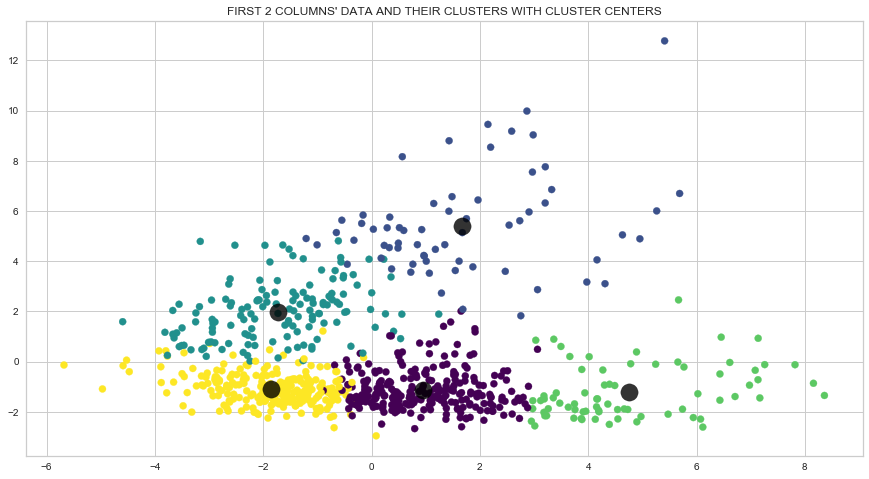

In [54]:
# First 2 columns' datas and their clusters with cluster centers

plt.figure(figsize = (15,8))

clusters = k_fit.labels_

plt.scatter(new_df[:,0],new_df[:,1], c = clusters , s = 50, cmap = 'viridis_r');

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0],centers[:,1],c = "black", s = 300 ,alpha = 0.8);

plt.title("FIRST 2 COLUMNS' DATA AND THEIR CLUSTERS WITH CLUSTER CENTERS");

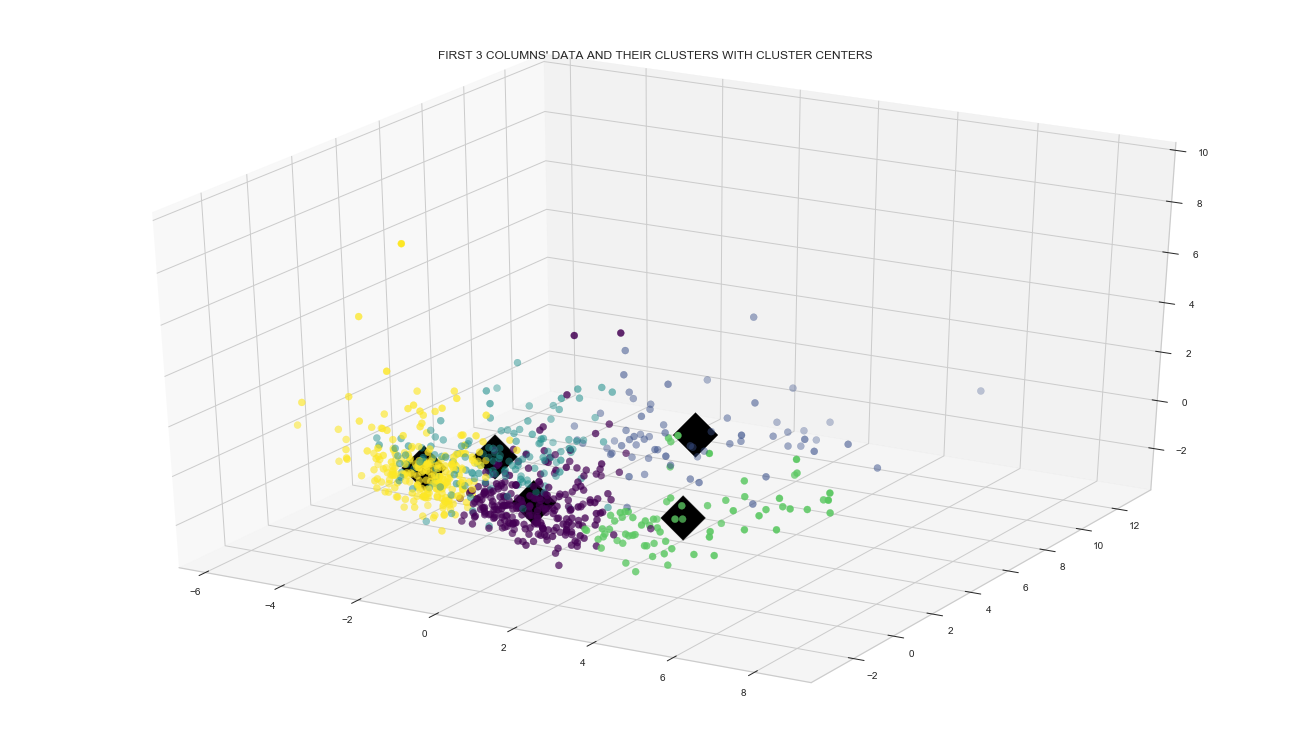

In [55]:
# First 3 columns' datas and their clusters with cluster centers

fig = plt.figure(figsize = (18,10))

ax = Axes3D(fig)

ax.scatter(new_df[:, 0], new_df[:, 1], new_df[:, 2], c = clusters,cmap = 'viridis_r',s = 50)

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='D', c='black',alpha = 1, s=1000);

plt.title("FIRST 3 COLUMNS' DATA AND THEIR CLUSTERS WITH CLUSTER CENTERS");

In [56]:
#universities with their cluster number

university_cluster = pd.DataFrame({"University":df.index , "Cluster No": clusters})

university_cluster.head(30)

,University,Cluster No
0,Abilene Christian University,0
1,Adelphi University,0
2,Adrian College,0
3,Agnes Scott College,1
4,Alaska Pacific University,0
5,Albertson College,0
6,Albertus Magnus College,4
7,Albion College,4
8,Albright College,4
9,Alderson-Broaddus College,0


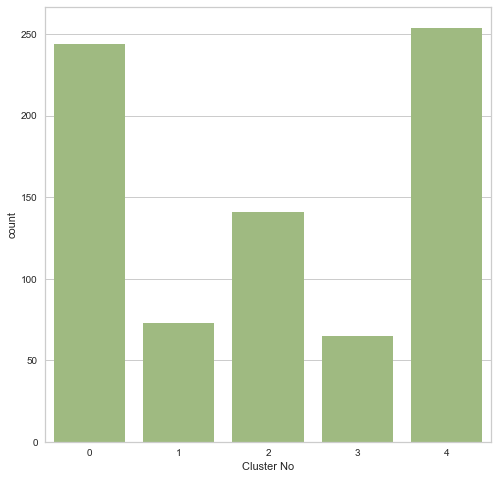

In [57]:
#count of our clusters

plt.figure(figsize = (8,8))

sns.countplot(university_cluster["Cluster No"],color ='g');